##### **LOAD DATASET**

In [1]:
# Change Path Accordingly
data <- read.csv("/home/ilesh-dhall/Metabolomics-Biomarker-Discovery/data/A_Targeted_Metabolomics-Based_Assay_Using_Human_Induced_Pluripotent_Stem_Cell-Derived_Cardiomyocytes_rawdata.csv", stringsAsFactors = FALSE)

##### **EDA**

In [2]:
str(data)

'data.frame':	22894 obs. of  8 variables:
 $ Compound     : chr  "Phenylphenol" "Phenylphenol" "Phenylphenol" "Phenylphenol" ...
 $ Effect       : chr  "Non" "Non" "Non" "Non" ...
 $ Metabolite   : chr  "Arachidonic Acid" "2'-deoxycytidine" "Thymidine" "2'-deoxycytidine" ...
 $ Plate        : chr  "C166" "C166" "C166" "C166" ...
 $ Dose         : num  1e-01 1e+02 1e-01 3e-01 1e+01 1e+01 1e+02 1e+02 3e-02 3e+00 ...
 $ SampleType   : chr  "cells" "cells" "cells" "cells" ...
 $ Well         : chr  "f5" "f11" "f5" "f6" ...
 $ ApexIntensity: num  347678 1875 18610 4940 52747 ...


In [3]:
head(data)
tail(data)

,Compound,Effect,Metabolite,Plate,Dose,SampleType,Well,ApexIntensity
,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>
1,Phenylphenol,Non,Arachidonic Acid,C166,0.1,cells,f5,347678.250
2,Phenylphenol,Non,2'-deoxycytidine,C166,100.0,cells,f11,1875.018
3,Phenylphenol,Non,Thymidine,C166,0.1,cells,f5,18609.705
4,Phenylphenol,Non,2'-deoxycytidine,C166,0.3,cells,f6,4940.108
5,Phenylphenol,Non,Thymidine.D4,C166,10.0,media,h9,52746.977
6,Phenylphenol,Non,Thymidine.D4,C166,10.0,cells,e9,57914.594


,Compound,Effect,Metabolite,Plate,Dose,SampleType,Well,ApexIntensity
,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>
22889,Verapamil,Cardiotoxic,Lactate,C148,30,media,h2,17300.06
22890,Verapamil,Cardiotoxic,Thymidine.D4,C147,30,cells,e2,68259.00
22891,Verapamil,Cardiotoxic,Arachidonic Acid,C173,30,cells,e2,211973.20
22892,Verapamil,Cardiotoxic,Thymidine.D4,C158,30,cells,e2,86957.87
22893,Verapamil,Cardiotoxic,Arachidonic Acid,C173,30,cells,g2,249296.16
22894,Verapamil,Cardiotoxic,Lactate.D3,C147,30,cells,e2,18778.38


In [4]:
summary(data)

   Compound            Effect           Metabolite           Plate          
 Length:22894       Length:22894       Length:22894       Length:22894      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
      Dose           SampleType            Well           ApexIntensity      
 Min.   :   0.003   Length:22894       Length:22894       Min.   :    337.1  
 1st Qu.:   0.100   Class :character   Class :character   1st Qu.:  10536.8  
 Median :   1.000   Mode  :character   Mode  :character   Median :  21309.8  
 Mean   :  18.315                                         Mean   :  76140.7  
 3rd Qu.:  10.000                                         3rd Qu.:  680

In [5]:
# Check for missing values
missing_values <- sapply(data, function(x) sum(is.na(x)))
missing_values

Compound        Effect    Metabolite         Plate          Dose 
            0             0             0             0             0 
   SampleType          Well ApexIntensity 
            0             0             0

In [6]:
View(data)

Compound,Effect,Metabolite,Plate,Dose,SampleType,Well,ApexIntensity
<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Phenylphenol,Non,Arachidonic Acid,C166,1e-01,cells,f5,347678.250
Phenylphenol,Non,2'-deoxycytidine,C166,1e+02,cells,f11,1875.018
Phenylphenol,Non,Thymidine,C166,1e-01,cells,f5,18609.705
Phenylphenol,Non,2'-deoxycytidine,C166,3e-01,cells,f6,4940.108
Phenylphenol,Non,Thymidine.D4,C166,1e+01,media,h9,52746.977
Phenylphenol,Non,Thymidine.D4,C166,1e+01,cells,e9,57914.594
Phenylphenol,Non,2'-deoxycytidine,C166,1e+02,cells,g11,2383.089
Phenylphenol,Non,2'-deoxycytidine,C166,1e+02,cells,e11,2488.633
Phenylphenol,Non,Thymidine.D4,C166,3e-02,cells,e4,55495.668


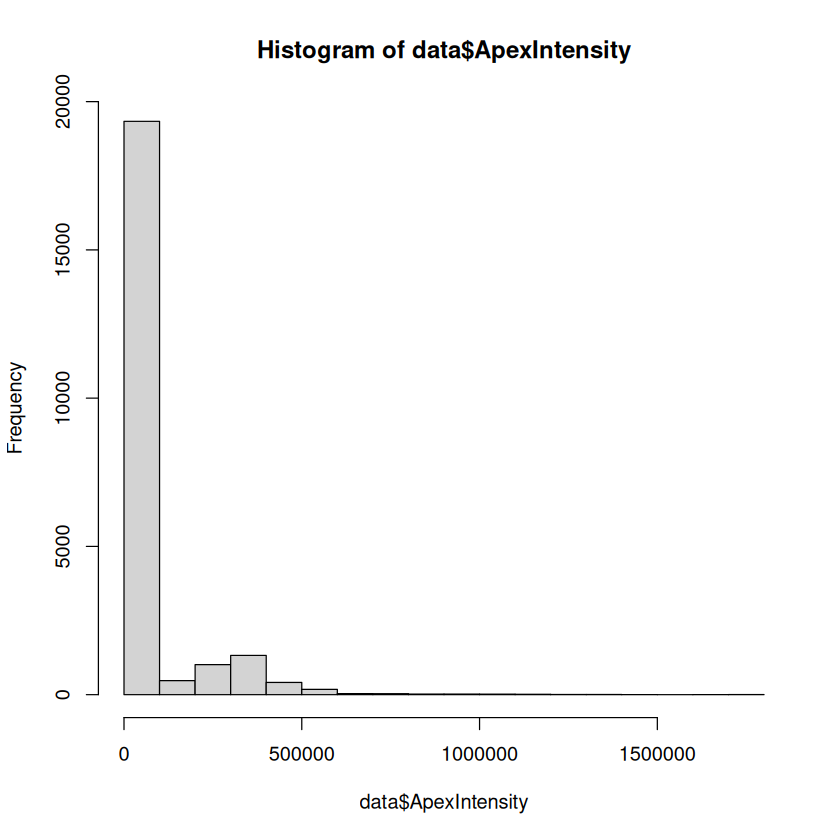

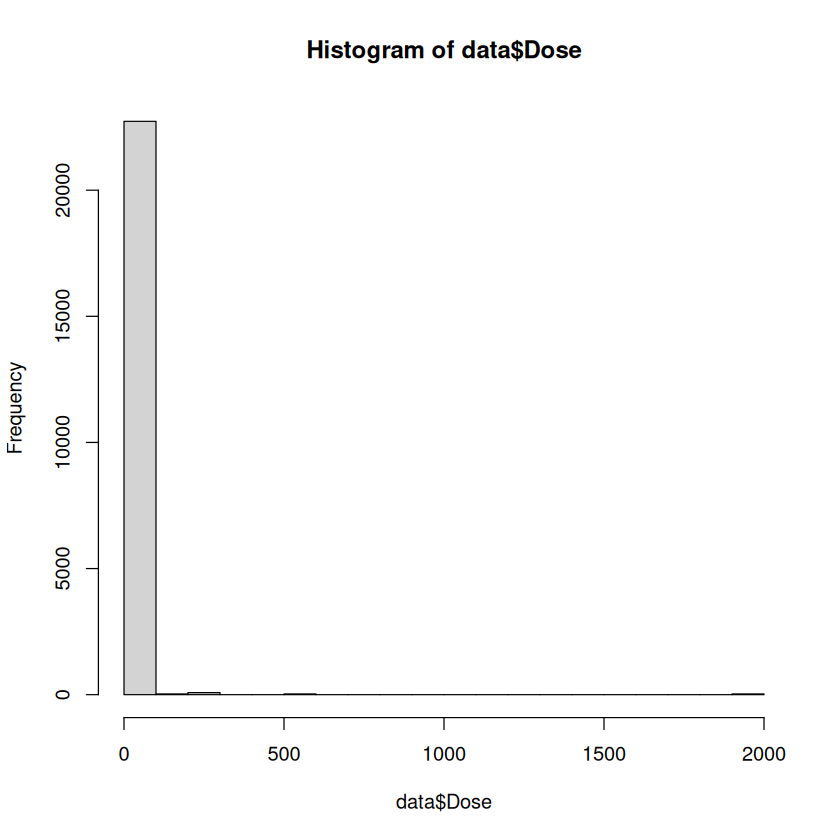

In [7]:
par(bg = "white")
hist(data$ApexIntensity)
hist(data$Dose)

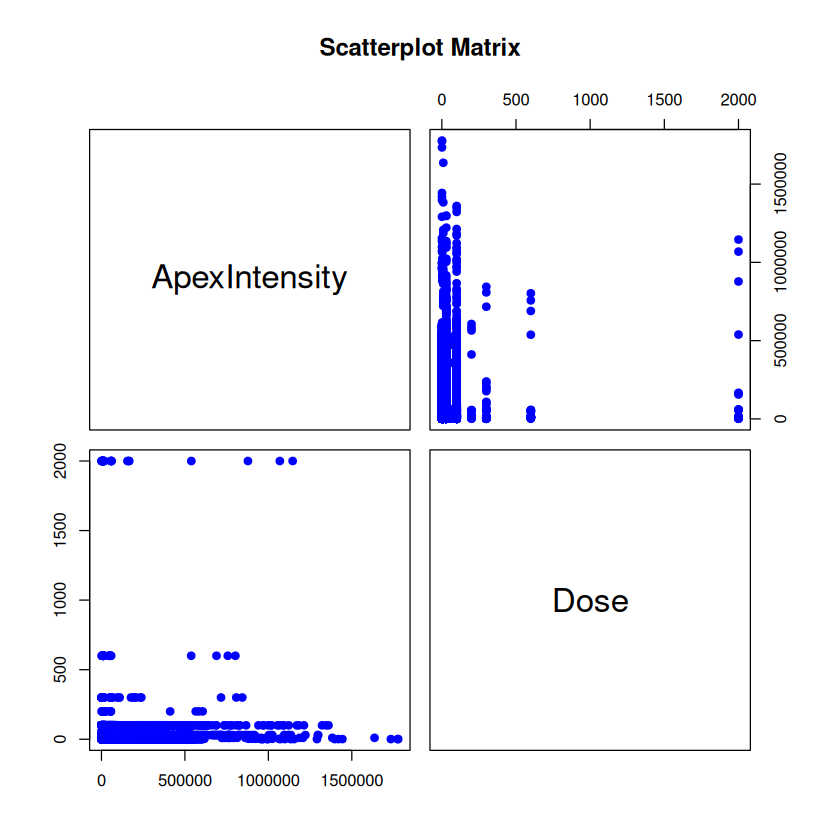

In [8]:
par(bg = "white")
pairs(data[, c("ApexIntensity", "Dose")], main = "Scatterplot Matrix", pch = 19, col = "blue")